<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

**Top colleges recruit high performing high school students and require higher test scores for those students to be able to get into their school.  This project aims at helping those colleges find where they can recruit more high performing students based on standardized test scores across the country and allocate more marketing resources to those states.**

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**An article from the Washington Post states that colleges spend billions on marketing themselves to potential students.  (https://www.washingtonpost.com/local/education/colleges-marketing-student-recruitment/2021/09/30/b6ddd246-2166-11ec-8200-5e3fd4c49f5e_story.html)**

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

**For this project, I will be using the 'act_2019.csv: 2019 ACT Scores by State' and the 'sat_2019.csv: 2019 SAT Scores by State' datasets** 

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def the_mean(values):
    return sum(values) / len(values)

the_mean([8, 10, 12]), the_mean([25, 50, 75, 100, 125])

(10.0, 75.0)

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def standard_dev(values):
    demean = []
    for i in values:
        demean.append((i - the_mean(values)) ** 2)
    return (sum(demean) / len(values)) ** (1/2)

standard_dev([8, 10, 12]), standard_dev([25, 50, 75, 100, 125])

(1.632993161855452, 35.35533905932738)

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
def data_cleaning(string):
    num_list = []
    for i in string:
        num_list.append(i)
    return float(''.join(num_list[0:-1])) / 100

data_cleaning('85.2345%')

0.852345

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
sat19 = pd.read_csv('../data/sat_2019.csv')
act19 = pd.read_csv('../data/act_2019.csv')

In [6]:
sat19.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [7]:
act19.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


---

In [8]:
sat19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [9]:
act19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [10]:
sat19.isnull().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [11]:
act19.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

---

In [12]:
# list of states taken from https://gist.github.com/norcal82/e4c7e8113f377db184bb
# I added 'District of Columbia' to state_names after seeing it was a part of both data sets

state_names = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "District of Columbia", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

In [13]:
# referenced https://www.codegrepper.com/code-examples/python/opposite+of+.isin+pandas

drop_states_sat = sat19[sat19['State'].isin(state_names) == False]
drop_states_sat

,State,Participation Rate,EBRW,Math,Total
39,Puerto Rico,—,483,462,944
47,Virgin Islands,—,490,445,935


In [14]:
drop_states_act = act19[act19['State'].isin(state_names) == False]
drop_states_act

,State,Participation,Composite
51,National,52%,20.7


In [15]:
sat19.drop([39, 47], inplace=True)

In [16]:
# referenced method from https://stackoverflow.com/questions/67306234/resetting-index-after-removing-rows-from-pandas-data-frame

sat19.reset_index(drop=True, inplace=True)

In [17]:
act19.drop([51], inplace=True)

In [18]:
act19.reset_index(drop=True, inplace=True)

In [19]:
sat19.describe()

,EBRW,Math,Total
count,51.000000,51.000000,51.000000
mean,560.803922,552.196078,1113.078431
std,46.248035,51.290553,97.197910
min,483.000000,460.000000,943.000000
25%,527.500000,511.500000,1038.000000
50%,550.000000,546.000000,1097.000000
75%,612.000000,599.000000,1210.000000
max,636.000000,648.000000,1284.000000


**SAT max total score ranges from 400-1600 and EBRW and Math scores range from 200-800.  This info was obtained from https://collegereadiness.collegeboard.org/sat/scores/understanding-scores/interpreting. Minimums and maximums for all 3 scoring categories fall within the correct ranges.**

In [20]:
act19.describe()

,Composite
count,51.000000
mean,21.464706
std,2.194523
min,17.900000
25%,19.800000
50%,21.100000
75%,23.700000
max,25.500000


**ACT scores range between 1 and 36 according to https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html The minimum and maximum score fall within the correct range.**

In [21]:
sat19.isnull().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [22]:
act19.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

---

In [23]:
sat19.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [24]:
act19.dtypes

State             object
Participation     object
Composite        float64
dtype: object

---

In [25]:
#referenced intro to pandas Lecture

sat19['Participation Rate'] = sat19['Participation Rate'].map(data_cleaning)

In [26]:
sat19.dtypes

State                  object
Participation Rate    float64
EBRW                    int64
Math                    int64
Total                   int64
dtype: object

In [27]:
act19['Participation'] = act19['Participation'].map(data_cleaning)

In [28]:
act19.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

---

In [29]:
#referenced EDA lecture

sat_columns = {
    'State': 'state',
    'Participation Rate': 'sat_participation_rate',
    'EBRW': 'read_and_write_score',
    'Math': 'math_score',
    'Total': 'total_sat_score'
}

In [30]:
act_columns = {
    'State': 'state',
    'Participation': 'act_participation_rate',
    'Composite': 'composite_score'
}

In [31]:
sat19.rename(columns=sat_columns, inplace=True)

In [32]:
sat19.sort_values('state', inplace=True)

In [33]:
act19.rename(columns=act_columns, inplace=True)

In [34]:
act19.sort_values('state', inplace=True)

---

In [35]:
# already dropped territories during earlier cleaning

---

In [36]:
#referenced intro to pandas lecture

std_scores_2019 = pd.merge(sat19, act19, how='left')
std_scores_2019.head()

,state,sat_participation_rate,read_and_write_score,math_score,total_sat_score,act_participation_rate,composite_score
0,Alabama,0.07,583,560,1143,1.00,18.9
1,Alaska,0.41,556,541,1097,0.38,20.1
2,Arizona,0.31,569,565,1134,0.73,19.0
3,Arkansas,0.06,582,559,1141,1.00,19.3
4,California,0.63,534,531,1065,0.23,22.6


---

In [37]:
# check to ensure total SAT score is combination of EBRW and Math scores

std_scores_2019['total_sat_score'] == std_scores_2019['read_and_write_score'] + std_scores_2019['math_score']

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7      True
8      True
9      True
10    False
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18    False
19    False
20     True
21     True
22     True
23     True
24    False
25    False
26     True
27    False
28     True
29     True
30    False
31     True
32     True
33     True
34     True
35    False
36    False
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44    False
45     True
46    False
47     True
48     True
49     True
50     True
dtype: bool

In [38]:
std_scores_2019[std_scores_2019['total_sat_score'] != std_scores_2019['read_and_write_score'] + std_scores_2019['math_score']]

,state,sat_participation_rate,read_and_write_score,math_score,total_sat_score,act_participation_rate,composite_score
6,Connecticut,1.00,529,516,1046,0.22,25.5
10,Georgia,0.71,538,519,1058,0.49,21.4
18,Louisiana,0.05,610,591,1200,1.00,18.8
19,Maine,0.99,512,502,1013,0.06,24.3
24,Mississippi,0.03,628,608,1237,1.00,18.4
25,Missouri,0.04,622,615,1236,0.82,20.8
27,Nebraska,0.03,628,631,1260,1.00,20.0
30,New Jersey,0.82,544,545,1090,0.25,24.2
35,Ohio,0.19,550,548,1097,1.00,20.0
36,Oklahoma,0.22,490,472,963,1.00,18.9


In [39]:
std_scores_2019.to_csv('../data/std_scores_2019')

**All total SAT scores within 1 point of combination of EBRW and Math scores -- rounding errors seemed to have caused the discrepancy, but don't seem to affect the data.**

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|*object*|ACT/SAT|State where the SAT/ACT data is compiled for|
|sat_participation_rate|*float*|SAT|Participation rate for the SAT test for the state(units to 2 decimal places between 0 and 1 where 0.07 means 7%)|
|read_and_write_score|*integer*|SAT|Average Evidence-Based Reading and Writing score for the state|
|math_score|*integer*|SAT|Average Math score for the state|
|total_sat_score|*integer*|SAT|Average Total SAT score for the state (combination EBRW and Math score)|
|act_participation_rate|*float*|ACT|Participation rate for the ACT test for the state(units to 2 decimal places between 0 and 1 where 0.07 means 7%)|
|composite_score|*float*|ACT|Average Total ACT score for the state|


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [40]:
std_scores_2019.describe()

,sat_participation_rate,read_and_write_score,math_score,total_sat_score,act_participation_rate,composite_score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.490588,560.803922,552.196078,1113.078431,0.586667,21.464706
std,0.387476,46.248035,51.290553,97.197910,0.345159,2.194523
min,0.020000,483.000000,460.000000,943.000000,0.060000,17.900000
25%,0.055000,527.500000,511.500000,1038.000000,0.245000,19.800000
50%,0.540000,550.000000,546.000000,1097.000000,0.540000,21.100000
75%,0.820000,612.000000,599.000000,1210.000000,1.000000,23.700000
max,1.000000,636.000000,648.000000,1284.000000,1.000000,25.500000


In [41]:
std_scores_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   sat_participation_rate  51 non-null     float64
 2   read_and_write_score    51 non-null     int64  
 3   math_score              51 non-null     int64  
 4   total_sat_score         51 non-null     int64  
 5   act_participation_rate  51 non-null     float64
 6   composite_score         51 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.2+ KB


In [42]:
std_scores_2019.shape

(51, 7)

---

In [43]:
num_columns = std_scores_2019.dtypes[std_scores_2019.dtypes != 'object'].index

In [44]:
sd = {col: standard_dev(std_scores_2019[col]) for col in num_columns}
sd

{'sat_participation_rate': 0.3836584048685726,
 'read_and_write_score': 45.792378682545134,
 'math_score': 50.78521461840036,
 'total_sat_score': 96.24027185617864,
 'act_participation_rate': 0.3417582373703047,
 'composite_score': 2.172901153595978}

---

In [45]:
std_scores_2019.corr()

,sat_participation_rate,read_and_write_score,math_score,total_sat_score,act_participation_rate,composite_score
sat_participation_rate,1.000000,-0.873453,-0.845841,-0.861786,-0.865435,0.724619
read_and_write_score,-0.873453,1.000000,0.986026,0.996134,0.688592,-0.460065
math_score,-0.845841,0.986026,1.000000,0.996825,0.643101,-0.390668
total_sat_score,-0.861786,0.996134,0.996825,1.000000,0.666966,-0.424782
act_participation_rate,-0.865435,0.688592,0.643101,0.666966,1.000000,-0.866819
composite_score,0.724619,-0.460065,-0.390668,-0.424782,-0.866819,1.000000


In [46]:
std_scores_2019['sat_participation_rate'].corr(std_scores_2019['act_participation_rate'])

-0.8654353036794787

**SAT and ACT participation rates are negatively correlated.  When SAT participation increased, ACT participation decreased.  Certain states seem to focus on one test and not so much on the other.**

---

In [47]:
top10sat = std_scores_2019.sort_values('total_sat_score', ascending=False).head(10)
top10sat

,state,sat_participation_rate,read_and_write_score,math_score,total_sat_score,act_participation_rate,composite_score
23,Minnesota,0.04,636,648,1284,0.95,21.4
49,Wisconsin,0.03,635,648,1283,1.00,20.3
41,South Dakota,0.03,633,635,1268,0.75,21.6
34,North Dakota,0.02,627,636,1263,0.96,19.9
27,Nebraska,0.03,628,631,1260,1.00,20.0
15,Iowa,0.03,622,622,1244,0.66,21.6
16,Kansas,0.04,618,623,1241,0.72,21.2
50,Wyoming,0.03,623,615,1238,1.00,19.8
24,Mississippi,0.03,628,608,1237,1.00,18.4
25,Missouri,0.04,622,615,1236,0.82,20.8


In [48]:
bot10sat_part = std_scores_2019.sort_values('sat_participation_rate').head(10)
bot10sat_part

,state,sat_participation_rate,read_and_write_score,math_score,total_sat_score,act_participation_rate,composite_score
34,North Dakota,0.02,627,636,1263,0.96,19.9
50,Wyoming,0.03,623,615,1238,1.00,19.8
41,South Dakota,0.03,633,635,1268,0.75,21.6
27,Nebraska,0.03,628,631,1260,1.00,20.0
49,Wisconsin,0.03,635,648,1283,1.00,20.3
24,Mississippi,0.03,628,608,1237,1.00,18.4
15,Iowa,0.03,622,622,1244,0.66,21.6
44,Utah,0.04,614,615,1230,1.00,20.3
23,Minnesota,0.04,636,648,1284,0.95,21.4
17,Kentucky,0.04,620,612,1232,1.00,19.8


In [49]:
# created a set to find intersection. referenced https://stackoverflow.com/questions/39551566/create-a-set-from-a-series-in-pandas

set(top10sat['state']).intersection(set(bot10sat_part['state']))

{'Iowa',
 'Minnesota',
 'Mississippi',
 'Nebraska',
 'North Dakota',
 'South Dakota',
 'Wisconsin',
 'Wyoming'}

**Out of the top 10 SAT-scoring states, 8 of those states are in the bottom 10 for SAT participation rate.**

In [50]:
top10act = std_scores_2019.sort_values('composite_score', ascending=False).head(10)
top10act

,state,sat_participation_rate,read_and_write_score,math_score,total_sat_score,act_participation_rate,composite_score
21,Massachusetts,0.81,559,561,1120,0.21,25.5
6,Connecticut,1.00,529,516,1046,0.22,25.5
29,New Hampshire,0.95,533,526,1059,0.14,25.0
39,Rhode Island,1.00,503,492,995,0.12,24.7
32,New York,0.79,531,533,1064,0.22,24.5
22,Michigan,1.00,507,496,1003,0.19,24.4
19,Maine,0.99,512,502,1013,0.06,24.3
13,Illinois,1.00,509,504,1013,0.35,24.3
30,New Jersey,0.82,544,545,1090,0.25,24.2
45,Vermont,0.66,560,546,1106,0.20,24.1


In [51]:
bot10act_part = std_scores_2019.sort_values('act_participation_rate').head(10)
bot10act_part

,state,sat_participation_rate,read_and_write_score,math_score,total_sat_score,act_participation_rate,composite_score
19,Maine,0.99,512,502,1013,0.06,24.3
39,Rhode Island,1.00,503,492,995,0.12,24.7
7,Delaware,1.00,499,486,985,0.13,24.1
29,New Hampshire,0.95,533,526,1059,0.14,25.0
38,Pennsylvania,0.70,545,537,1082,0.17,23.6
22,Michigan,1.00,507,496,1003,0.19,24.4
45,Vermont,0.66,560,546,1106,0.20,24.1
46,Virginia,0.68,567,551,1119,0.21,24.0
21,Massachusetts,0.81,559,561,1120,0.21,25.5
32,New York,0.79,531,533,1064,0.22,24.5


In [52]:
set(top10act['state']).intersection(set(bot10act_part['state']))

{'Maine',
 'Massachusetts',
 'Michigan',
 'New Hampshire',
 'New York',
 'Rhode Island',
 'Vermont'}

**Out of the top 10 ACT-scoring states, 7 of those states are in the bottom 10 for ACT participation rate.**

In [53]:
top10sat['sat_participation_rate'].mean()

0.032

In [54]:
top10act['act_participation_rate'].mean()

0.196

**The top 10 scoring states in the SAT and ACT have average participation rates of 3.2% and 19.6% respectively.  There seems to be a negative correlation between scores and participation rates.  Therefore, in order to find the top scoring states for each test, we need to ensure a majority of the students are participating in that test.**

In [55]:
top10sat_part = std_scores_2019[std_scores_2019['sat_participation_rate'] > .5].sort_values('total_sat_score', ascending=False).head(10)
top10sat_part

,state,sat_participation_rate,read_and_write_score,math_score,total_sat_score,act_participation_rate,composite_score
21,Massachusetts,0.81,559,561,1120,0.21,25.5
46,Virginia,0.68,567,551,1119,0.21,24.0
37,Oregon,0.51,562,550,1112,0.42,21.1
45,Vermont,0.66,560,546,1106,0.20,24.1
33,North Carolina,0.51,554,546,1100,1.00,19.0
11,Hawaii,0.54,550,550,1100,0.80,19.0
30,New Jersey,0.82,544,545,1090,0.25,24.2
38,Pennsylvania,0.70,545,537,1082,0.17,23.6
14,Indiana,0.66,543,537,1080,0.29,22.5
47,Washington,0.70,539,535,1074,0.24,22.1


In [56]:
top10act_part = std_scores_2019[std_scores_2019['act_participation_rate'] > .5].sort_values('composite_score', ascending=False).head(10)
top10act_part

,state,sat_participation_rate,read_and_write_score,math_score,total_sat_score,act_participation_rate,composite_score
15,Iowa,0.03,622,622,1244,0.66,21.6
41,South Dakota,0.03,633,635,1268,0.75,21.6
23,Minnesota,0.04,636,648,1284,0.95,21.4
16,Kansas,0.04,618,623,1241,0.72,21.2
25,Missouri,0.04,622,615,1236,0.82,20.8
49,Wisconsin,0.03,635,648,1283,1.00,20.3
44,Utah,0.04,614,615,1230,1.00,20.3
9,Florida,1.00,516,483,999,0.54,20.1
27,Nebraska,0.03,628,631,1260,1.00,20.0
35,Ohio,0.19,550,548,1097,1.00,20.0


**Although the average test scores are lower than states with less than 50% participation rates, the states above are the top 10 scoring states on average for the SAT and ACT where a majority of the students have taken the respective standardized test.**

---

In [57]:
# the states below have top SAT scores based on a 50% participation rate minimum and have high ACT scores as well disregarding participation

satpart_act = set(top10act['state']).intersection(set(top10sat_part['state']))
satpart_act

{'Massachusetts', 'New Jersey', 'Vermont'}

**Massachusetts, New Jersey, and Vermont are all states that fall within the top 10 for average SAT scores with a minimum of 50% participation rate in the SAT test.  They also fall in the top 10 for ACT scores regardless of participation.  Although a majority of the students in these states tend to take the SAT test, the ones that take the ACT perform well also.**

In [58]:
# the states below have top ACT scores based on a 50% participation rate minimum and have high SAT scores as well disregarding participation


actpart_sat = set(top10sat['state']).intersection(set(top10act_part['state']))
actpart_sat

{'Iowa',
 'Kansas',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'South Dakota',
 'Wisconsin'}

**Iowa, Kansas, Minnesota, Missouri, Nebraska, South Dakota, and Wisconsin are all states that fall within the top 10 for average ACT scores with a minimum of 50% participation rate in the ACT test.  They also fall in the top 10 for SAT scores regardless of participation.  Although a majority of the students in these states tend to take the ACT test, the ones that take the SAT perform well also.**

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [59]:
corr = std_scores_2019.corr()

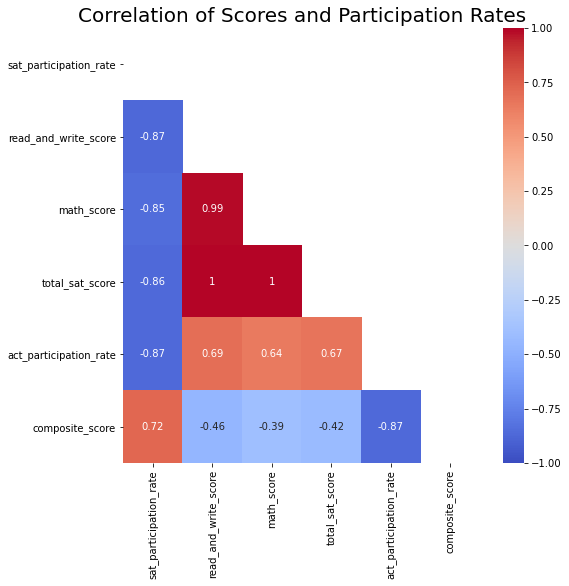

In [60]:
# referenced and used code from Data Visualization lecture

plt.figure(figsize=(8, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.title('Correlation of Scores and Participation Rates', size=20)
sns.heatmap(std_scores_2019.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, mask=mask)
plt.savefig('../visualizations/Correlation_Scores_PartRates_Heatmap.png');

**Heat map above shows correlation between variables.  The intersections of variables in red show a more positive correlation and the intersections of variables in blue show a more negative correlation.**

---

In [61]:
std_scores_2019.describe()

,sat_participation_rate,read_and_write_score,math_score,total_sat_score,act_participation_rate,composite_score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.490588,560.803922,552.196078,1113.078431,0.586667,21.464706
std,0.387476,46.248035,51.290553,97.197910,0.345159,2.194523
min,0.020000,483.000000,460.000000,943.000000,0.060000,17.900000
25%,0.055000,527.500000,511.500000,1038.000000,0.245000,19.800000
50%,0.540000,550.000000,546.000000,1097.000000,0.540000,21.100000
75%,0.820000,612.000000,599.000000,1210.000000,1.000000,23.700000
max,1.000000,636.000000,648.000000,1284.000000,1.000000,25.500000


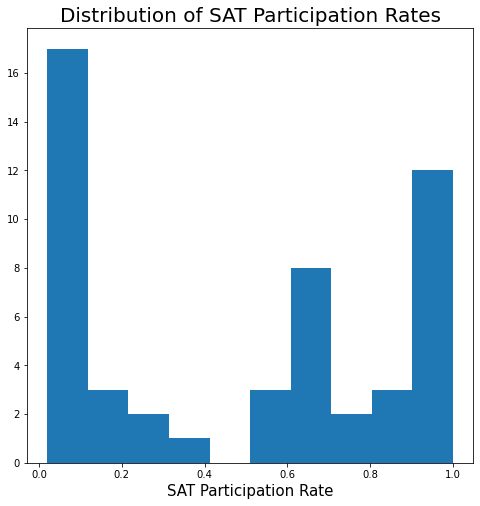

In [62]:
plt.figure(figsize=(8,8))
plt.title('Distribution of SAT Participation Rates', size=20)
plt.xlabel('SAT Participation Rate', size=15)
plt.hist(std_scores_2019['sat_participation_rate'], bins=10);

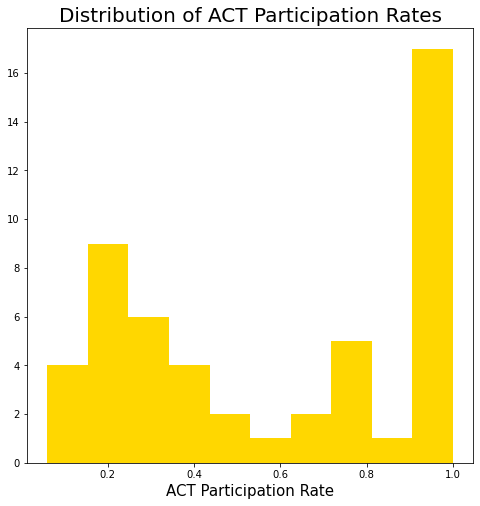

In [63]:
plt.figure(figsize=(8,8))
plt.title('Distribution of ACT Participation Rates', size=20)
plt.xlabel('ACT Participation Rate', size=15)
plt.hist(std_scores_2019['act_participation_rate'], bins=10, color='gold');

**The U-shaped curves show states either participate in one of the respective standardized test or they do not.  There are not many states that fall in the middle ranges of participation rates.**

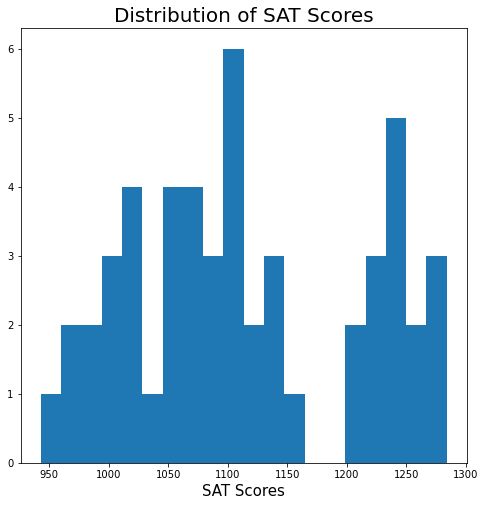

In [64]:
plt.figure(figsize=(8,8))
plt.title('Distribution of SAT Scores', size=20)
plt.xlabel('SAT Scores', size=15)
plt.hist(std_scores_2019['total_sat_score'], bins=20);

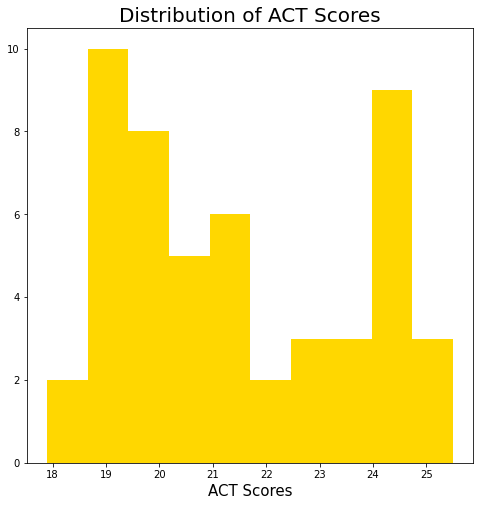

In [65]:
plt.figure(figsize=(8,8))
plt.title('Distribution of ACT Scores', size=20)
plt.xlabel('ACT Scores', size=15)
plt.hist(std_scores_2019['composite_score'], bins=10, color='gold');

---

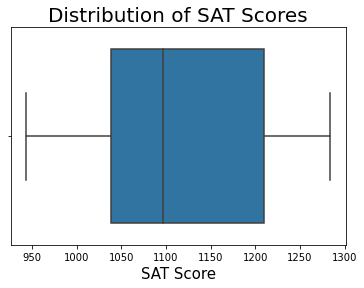

In [66]:
plt.title('Distribution of SAT Scores', size=20)
sat_box = sns.boxplot(x=std_scores_2019['total_sat_score'])
sat_box.set_xlabel('SAT Score', fontsize=15);

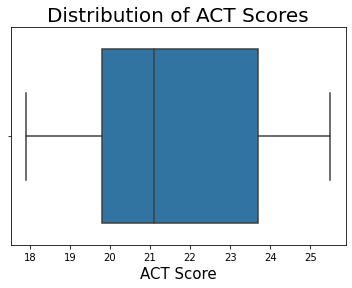

In [67]:
plt.title('Distribution of ACT Scores', size=20)
sat_box = sns.boxplot(x=std_scores_2019['composite_score'])
sat_box.set_xlabel('ACT Score', fontsize=15);

---

In [68]:
test_corr = std_scores_2019['sat_participation_rate'].corr(std_scores_2019['act_participation_rate'])
test_corr

-0.8654353036794787

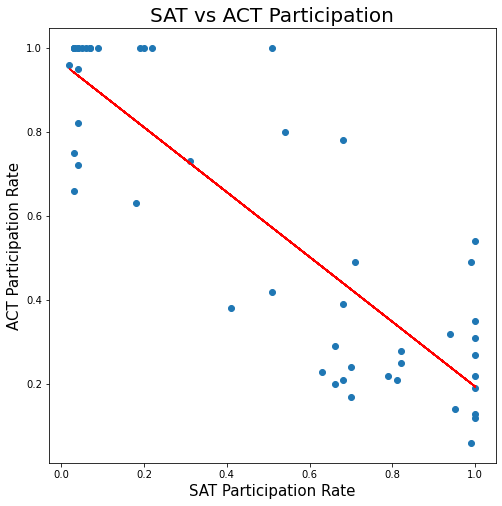

In [69]:
plt.figure(figsize=(8,8))
plt.title('SAT vs ACT Participation', size=20)
plt.xlabel('SAT Participation Rate', size=15)
plt.ylabel('ACT Participation Rate', size=15)
# 2 lines of code below from https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python
m, b = np.polyfit(std_scores_2019['sat_participation_rate'], std_scores_2019['act_participation_rate'], 1)
plt.plot(std_scores_2019['sat_participation_rate'], m * std_scores_2019['sat_participation_rate'] + b, color='r')
plt.scatter(std_scores_2019['sat_participation_rate'], std_scores_2019['act_participation_rate'])
plt.savefig('../visualizations/SATvsACT_Participation_Rate.png');

**The scatter plot above shows negative correlation between SAT participation rate and ACT participation rate for each state.  From this we can infer that states mainly focus on having students take one standardized test and not the other.**

---

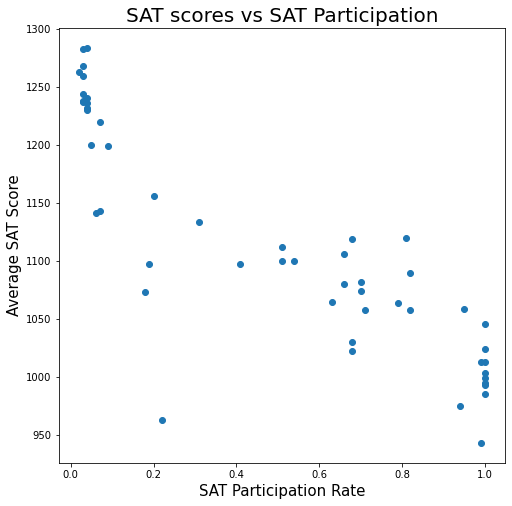

In [70]:
plt.figure(figsize=(8,8))
plt.title('SAT scores vs SAT Participation', size=20)
plt.xlabel('SAT Participation Rate', size=15)
plt.ylabel('Average SAT Score', size=15)
sat_score_part = plt.scatter(std_scores_2019['sat_participation_rate'], std_scores_2019['total_sat_score'])
plt.savefig('../visualizations/SAT_Scores_vs_SAT_Participation.png');

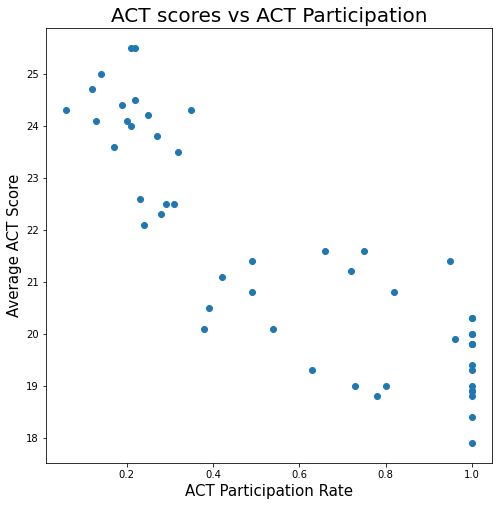

In [71]:
plt.figure(figsize=(8,8))
plt.title('ACT scores vs ACT Participation', size=20)
plt.xlabel('ACT Participation Rate', size=15)
plt.ylabel('Average ACT Score', size=15)
plt.scatter(std_scores_2019['act_participation_rate'], std_scores_2019['composite_score'])
plt.savefig('../visualizations/ACT_Scores_vs_ACT_Participation.png');

**The negative correlation between scores and participation rates show that schools with higher participation rates in a given standardized test tend to have lower scores in that test.  Therefore, states with lower participation rates need to be excluded from the data for that test to ensure there is enough participation to conclude that a state performs well on a given standardized test.**

---

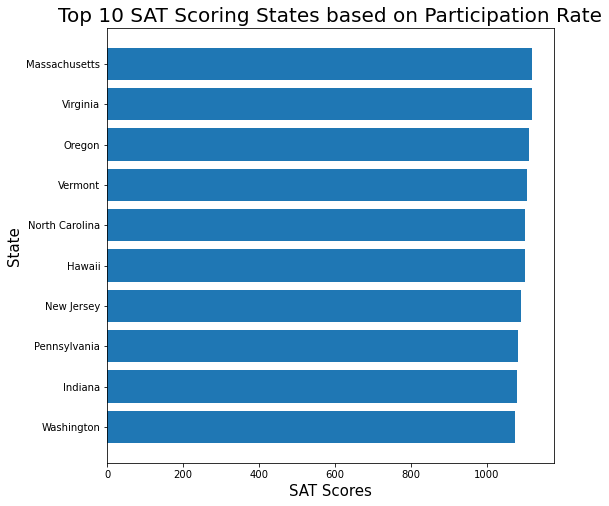

In [72]:
plt.figure(figsize=(8,8))
plt.title('Top 10 SAT Scoring States based on Participation Rate', size=20)
plt.xlabel('SAT Scores', size=15)
plt.ylabel('State', size=15)
plt.barh(y=top10sat_part['state'], width=top10sat_part['total_sat_score'])
plt.gca().invert_yaxis()  # code taken from https://www.google.com/search?q=how+to+reverse+the+order+of+y+axis+on+horizontal+bar+chart+in+python&oq=how+to+reverse+the+order+of+y+axis+on+horizontal+bar+chart+in+python&aqs=chrome..69i57.26787j0j4&sourceid=chrome&ie=UTF-8
plt.savefig('../visualizations/Top10SAT_Participation.png');

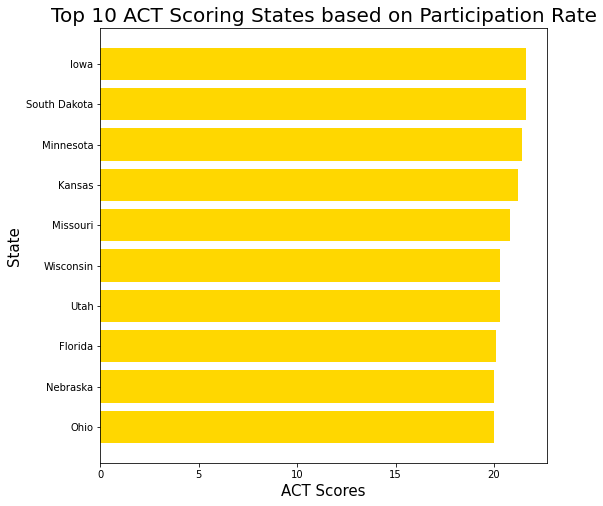

In [73]:
plt.figure(figsize=(8,8))
plt.title('Top 10 ACT Scoring States based on Participation Rate', size=20)
plt.xlabel('ACT Scores', size=15)
plt.ylabel('State', size=15)
plt.barh(y=top10act_part['state'], width=top10act_part['composite_score'], color='gold')
plt.gca().invert_yaxis()  # code taken from https://www.google.com/search?q=how+to+reverse+the+order+of+y+axis+on+horizontal+bar+chart+in+python&oq=how+to+reverse+the+order+of+y+axis+on+horizontal+bar+chart+in+python&aqs=chrome..69i57.26787j0j4&sourceid=chrome&ie=UTF-8
plt.savefig('../visualizations/Top10ACT_Participation.png');

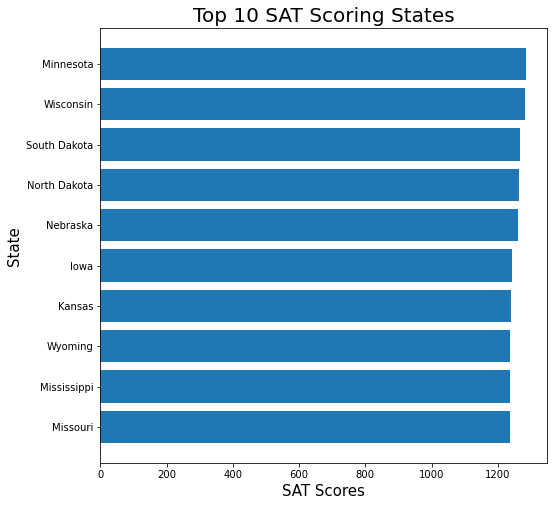

In [74]:
plt.figure(figsize=(8,8))
plt.title('Top 10 SAT Scoring States', size=20)
plt.xlabel('SAT Scores', size=15)
plt.ylabel('State', size=15)
plt.barh(y=top10sat['state'], width=top10sat['total_sat_score'])
plt.gca().invert_yaxis()  # code taken from https://www.google.com/search?q=how+to+reverse+the+order+of+y+axis+on+horizontal+bar+chart+in+python&oq=how+to+reverse+the+order+of+y+axis+on+horizontal+bar+chart+in+python&aqs=chrome..69i57.26787j0j4&sourceid=chrome&ie=UTF-8
plt.savefig('../visualizations/Top10SAT_Scoring.png');

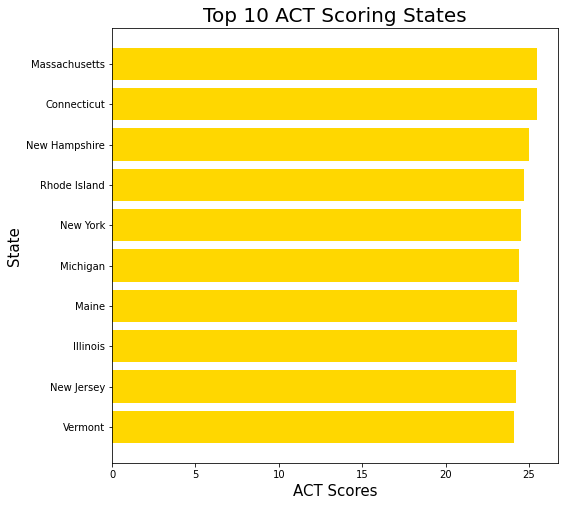

In [75]:
plt.figure(figsize=(8,8))
plt.title('Top 10 ACT Scoring States', size=20)
plt.xlabel('ACT Scores', size=15)
plt.ylabel('State', size=15)
plt.barh(y=top10act['state'], width=top10act['composite_score'], color='gold')
plt.gca().invert_yaxis()  # code taken from https://www.google.com/search?q=how+to+reverse+the+order+of+y+axis+on+horizontal+bar+chart+in+python&oq=how+to+reverse+the+order+of+y+axis+on+horizontal+bar+chart+in+python&aqs=chrome..69i57.26787j0j4&sourceid=chrome&ie=UTF-8
plt.savefig('../visualizations/Top10ACT_Scoring.png');

**The 4 plots above are the top scoring SAT and ACT states with and without a participation rate filter.**

**Massachusetts, New Jersey, and Vermont are all states that fall within the top 10 for average SAT scores with a minimum of 50% participation rate in the SAT test. They also fall in the top 10 for ACT scores regardless of participation. Although a majority of the students in these states tend to take the SAT test, the ones that take the ACT perform well also.**

**Iowa, Kansas, Minnesota, Missouri, Nebraska, South Dakota, and Wisconsin are all states that fall within the top 10 for average ACT scores with a minimum of 50% participation rate in the ACT test. They also fall in the top 10 for SAT scores regardless of participation. Although a majority of the students in these states tend to take the ACT test, the ones that take the SAT perform well also.**

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**Based on the most recent data prior to the pandemic for SAT and ACT scores and participation by state in 2019, we can conclude a few things.  First, we can see a clear negative relationship between the participation rates of each test meaning that if a state has a high participation rate in one test, they tend to have a low participation rate in the other test.  This is likely because each state tends to focus students more on one test when preparing for college than the other.  Next, we also see a negative relationship between a given test's scores and the participation rate for that test for both the SAT and ACT.  This is likely because when states push more students to take a test (including those that do not want to take it), it will push down the average test score for the state.**

**When adding a participation filter to ensure that a majority of the students in the state were taking a given test, we discovered the top 10 scoring states based on participation and compared them with the top 10 scoring states overall for each test.  Although none of the top 10 scoring states based on participation for the SAT and ACT were in the top 10 scoring states overall for their respective tests, there were some top 10 scoring states based on participation for the SAT that were also in the top 10 scoring overall states for the ACT and vice-versa.  MA, NJ, and VT were states that fell in the top 10 SAT-scoring states based on participation and were also in the top 10 overall states for ACT scores as well (although that had low participation in the ACT test).  IA, KS, MN, MO, NE, SD and WI were states that fell in the top 10 ACT-scoring states based on participation that were also in the top 10 overall states for SAT scores as well (although they had low participation in the SAT test).  High performing, motivated students in these states may have decided to take both test to increase their chances of getting into target schools.**

**Based on the data, I would recommend colleges invest marketing resources to some or all of the following states if they are looking to recruit students who perform better on standardized tests:  Massachusetts, New Jersey, Vermont, Iowa, Kansas, Minnesota, Missouri, Nebraska, South Dakota, or Wisconsin**

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!